In [1]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K
import matplotlib.pyplot as plt
import math

Using TensorFlow backend.
/opt/miniconda/envs/test/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/miniconda/envs/test/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/miniconda/envs/test/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/miniconda/envs/test/lib/python3.6/site-packag

In [2]:
def BuildModel():
    inputlayer1 = Input(shape=(20,10))
    inputlayer2 = Input(shape=(20,1))
    lstm1 = LSTM(units=10)(inputlayer1)
    lstm2 = LSTM(units=1)(inputlayer2)
    dense1 = Dense(10,activation='selu',kernel_initializer='lecun_normal')(lstm1)
    dense2 = Dense(10,activation='selu',kernel_initializer='lecun_normal')(lstm2)
    dense3 = concatenate([dense1,dense2],axis=1)
    dense3 = Dense(20,activation='selu',kernel_initializer='lecun_normal')(dense3)
    output = Dense(1,activation='selu',kernel_initializer='lecun_normal')(Reshape((-1,))(dense3))
    model = Model([inputlayer1,inputlayer2],output)
    model.compile(optimizer=Adam(0.0001),
                  loss='mse')
    model.summary()
    return model
model = BuildModel()

W0816 01:48:53.440447 139962999609152 deprecation_wrapper.py:119] From /opt/miniconda/envs/test/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0816 01:48:53.467596 139962999609152 deprecation_wrapper.py:119] From /opt/miniconda/envs/test/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 01:48:53.471848 139962999609152 deprecation_wrapper.py:119] From /opt/miniconda/envs/test/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0816 01:48:53.807264 139962999609152 deprecation_wrapper.py:119] From /opt/miniconda/envs/test/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_n

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 20, 10)       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 20, 1)        0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 10)           840         input_1[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 1)            12          input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (D

In [3]:
from sklearn.metrics import mean_squared_error,median_absolute_error
import pandas as pd
import numpy as np
df = pd.read_excel('第二组数据.xlsx',encoding='utf8',index_col=0)
df = df[df.index>'2004/6/1']
df.index = range(len(df))
X_columns = ['GARCH-alpha', 'GARCH-beta', 'alpha', 'beta', 'gamma', '摩根大通收盘价',
       '微软公司收盘价', '强生公司收盘价', '埃克森美孚收盘价', '苹果公司收盘价']
X = df[X_columns]
X2 = df['实际波动率.1']
y = df['实际波动率.1']

In [4]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
def gen():
    x_train = []
    x1_train = []
    y_train = []
    for i in range(len(df)):
        try:
            X = df.loc[i:i+19,X_columns]
            x1 = df.loc[i:i+19,'实际波动率.1']
            y = df.loc[i+20,'实际波动率.1']
            x_train.append(np.array(X)),x1_train.append(np.array(x1)),y_train.append(np.array(y))
        except:
            pass
    return np.array(x_train),np.array(x1_train).reshape(-1,20,1),np.array(y_train)
X,X1,y = gen()

In [6]:
X.shape,X1.shape
X = np.asarray(X)
X1 = np.asarray(X1)
X_con = np.concatenate((X,X1),axis=2)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = X_con[:2737],X_con[2737:],y[:2737],y[2737:]
x_train,x_val,y_train,y_val = X_con[:2189],X_con[2189:2737],y[:2189],y[2189:2737]
x_test.shape

(912, 20, 11)

In [8]:
model.fit([x_train[:,:,:10],x_train[:,:,10].reshape(-1,20,1)],y_train,epochs=100,validation_data=([x_val[:,:,:10],x_val[:,:,10].reshape(-1,20,1)],y_val))

W0816 01:48:59.814490 139962999609152 deprecation_wrapper.py:119] From /opt/miniconda/envs/test/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 2189 samples, validate on 548 samples
Epoch 1/100
2189/2189 [==============================] - 3s 1ms/step - loss: 2.3145 - val_loss: 2.3922
Epoch 2/100
2189/2189 [==============================] - 1s 653us/step - loss: 1.7428 - val_loss: 1.5415
Epoch 3/100
2189/2189 [==============================] - 1s 661us/step - loss: 1.1750 - val_loss: 0.7210
Epoch 4/100
2189/2189 [==============================] - 1s 649us/step - loss: 0.7926 - val_loss: 0.3725
Epoch 5/100
2189/2189 [==============================] - 1s 631us/step - loss: 0.6213 - val_loss: 0.2209
Epoch 6/100
2189/2189 [==============================] - 1s 617us/step - loss: 0.5103 - val_loss: 0.1175
Epoch 7/100
2189/2189 [==============================] - 1s 602us/step - loss: 0.4314 - val_loss: 0.0604
Epoch 8/100
2189/2189 [==============================] - 1s 628us/step - loss: 0.3763 - val_loss: 0.0316
Epoch 9/100
2189/2189 [==============================] - 1s 609us/step - loss: 0.3386 - val_loss: 0.0203
Epoch 10/1

In [9]:
def HMSE(y_test,prediction):
    scores = 0 
    for i,j in zip(y_test,prediction):
        scores += math.pow((1-j[0]/i), 2)
    return scores/len(y_test)
def HMAE(a,b):
    scores = 0
    for i,j in zip(a,b):
        scores += abs((1-j[0]/i))
    return scores/len(a)
prediction = model.predict([x_train[:,:,:10],x_train[:,:,10].reshape(-1,20,1)])
MSE = mean_squared_error(y_train,prediction)
MAE = median_absolute_error(y_train,prediction)
HMSE = HMSE(y_train,prediction)
HMAE = HMAE(y_train,prediction)
print("MSE:{},MAE:{},HMAE:{},HMSE:{}".format(MSE,MAE,HMAE,HMSE))

MSE:0.0031665575564219567,MAE:0.023379338771326252,HMAE:0.039931778774306176,HMSE:0.003678677070908799


In [10]:
def HMSE(y_test,prediction):
    scores = 0 
    for i,j in zip(y_test,prediction):
        scores += math.pow((1-j[0]/i), 2)
    return scores/len(y_test)
def HMAE(a,b):
    scores = 0
    for i,j in zip(a,b):
        scores += abs((1-j[0]/i))
    return scores/len(a)
prediction = model.predict([x_val[:,:,:10],x_val[:,:,10].reshape(-1,20,1)])
MSE = mean_squared_error(y_val,prediction)
MAE = median_absolute_error(y_val,prediction)
HMSE = HMSE(y_val,prediction)
HMAE = HMAE(y_val,prediction)
print("MSE:{},MAE:{},HMAE:{},HMSE:{}".format(MSE,MAE,HMAE,HMSE))

MSE:0.0018620805361791622,MAE:0.023363348950176832,HMAE:0.05014029580263759,HMSE:0.004962659010308961


MSE:0.005245690847830772,MAE:0.04537659784240655,HMAE:0.09304220922495077,HMSE:0.01678506784105573


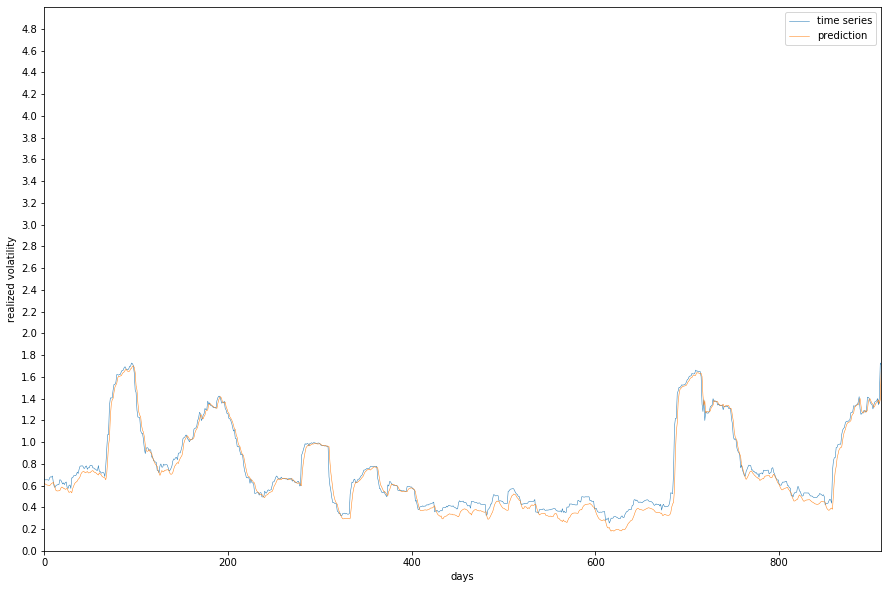

In [11]:
#测试集
def HMSE(y_test,prediction):
    scores = 0 
    for i,j in zip(y_test,prediction):
        scores += math.pow((1-j[0]/i), 2)
    return scores/len(y_test)
def HMAE(a,b):
    scores = 0
    for i,j in zip(a,b):
        scores += abs((1-j[0]/i))
    return scores/len(a)
prediction = model.predict([x_test[:,:,:10],x_test[:,:,10].reshape(-1,20,1)])
MSE = mean_squared_error(y_test,prediction)
MAE = median_absolute_error(y_test,prediction)
HMSE = HMSE(y_test,prediction)
HMAE = HMAE(y_test,prediction)
print("MSE:{},MAE:{},HMAE:{},HMSE:{}".format(MSE,MAE,HMAE,HMSE))
df_score = pd.DataFrame()
df_score['time series'] = y_test
df_score['prediction'] = prediction
df_score.to_excel("lstm3.xls",index=False)
df_score.plot(figsize=(15,10),linestyle='-',linewidth=0.5)
plt.ylim((0,5))
plt.yticks(np.arange(0, 5, step=0.2))
plt.xlabel('days')
plt.ylabel('realized volatility')
plt.savefig('a.pdf')
plt.show()

Text(0.5, 1.0, 'test of multi-linestyles and xticks')

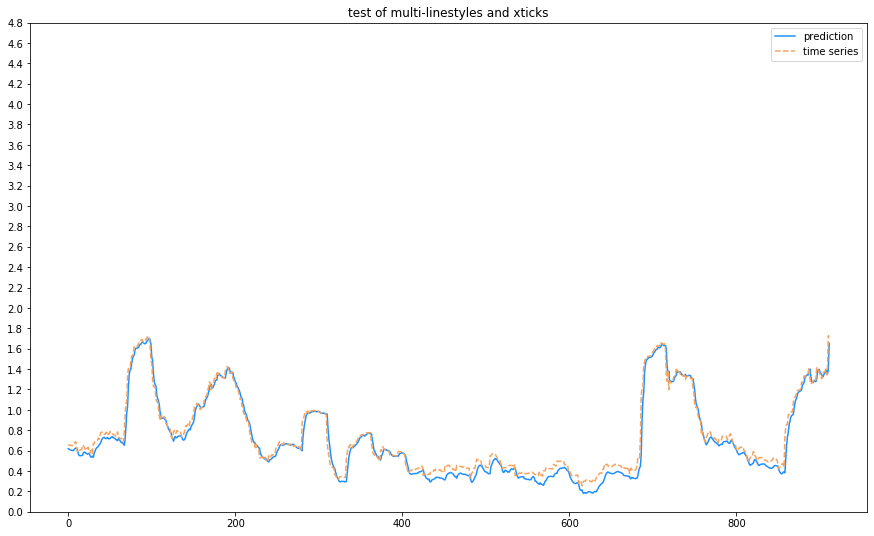

In [12]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(1,1,1)
ax.plot(df_score['prediction'],'-',c='dodgerblue', label='prediction')
ax.plot(df_score['time series'],'--',c='sandybrown', label='time series')
ax.legend()
ax.set_yticks(np.arange(0, 5, step=0.2))
ax.set_title('test of multi-linestyles and xticks')

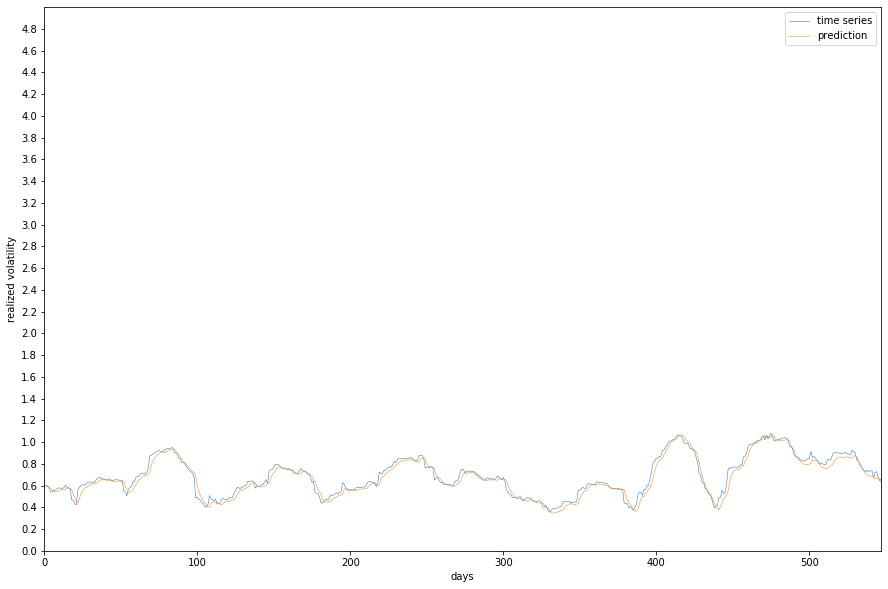

In [13]:
#测试集
def HMSE(y_test,prediction):
    scores = 0 
    for i,j in zip(y_test,prediction):
        scores += math.pow((1-j[0]/i), 2)
    return scores/len(y_test)
def HMAE(a,b):
    scores = 0
    for i,j in zip(a,b):
        scores += abs((1-j[0]/i))
    return scores/len(a)
prediction = model.predict([x_val[:,:,:10],x_val[:,:,10].reshape(-1,20,1)])

df_score = pd.DataFrame()
df_score['time series'] = y_val
df_score['prediction'] = prediction
df_score.to_excel("lstm3.xls",index=False)
df_score.plot(figsize=(15,10),linestyle='-',linewidth=0.5)
plt.ylim((0,5))
plt.yticks(np.arange(0, 5, step=0.2))
plt.xlabel('days')
plt.ylabel('realized volatility')
plt.savefig('a.pdf')
plt.show()